# **Project 2**
**Anomaly Detection Algorithm using Gaussian Mixture Model**


##**Part 1: Getting started [1.5 Marks]**

We are going to work with a [credit card fraud detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dataset, consisting of transactions made by credit cards in September 2013 by European cardholders. The dataset contains only numerical input variables (`V1`, `V2`, … `V28`) which are the principal components obtained with PCA transformation (PCA will the introduced later in this course), due to confidentiality issues. The only features which have not been transformed with PCA are `Time` (seconds elapsed between each transaction and the first transaction in the dataset) and `Amount` (transaction Amount).\
This dataset contains 30 key features, which are not
directly interpretable but contain meaningful information about the dataset.
Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?

284807 **[0.1]**
* Which column contains the targets?

There're 31 total columns, the target column is the 31th column named "Class" **[0.1]**

* What is the meaning of target values?

If the "Class" value is 1, it's a fraud, and 0 otherwise **[0.2]**

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=a6317646f5058956bc54c76fe6a70966d4ae715a907858e90322dccec40cd456
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score, precision_score, recall_score
import wget
wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/creditcard.csv')
print('Setup completed')

Setup completed


In [ ]:
### YOUR CODE HERE ###
df = pd.read_csv('creditcard.csv')
pd.set_option('display.max_columns', 1000) # let df to display the full columns
df.loc[0:4,:] # show 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print('Number of rows are',df.shape[0])
print('The column that contains the target is the '+str(df.columns.get_loc('Class')+1)+'th column')

Number of rows are 284807
The column that contains the target is the 31th column


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class?

The percentage of fraud in this data is 0.17%, the percentage of non-fraud is 99.83% **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?

The dataset is considered to be unbalanced when the distribution of categories is not approximately equal. In this case, the non-fraud case is significantly larger than the fraud case, therefore, this dataset is considered to be unbalanced **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?

Having balanced data is essential to ensure the accuracy and validity of machine learning models. If the data in Project 1 is unbalanced, for example, when class "0" significantly outnumbers class "1," the resulting model can achieve high accuracy scores by consistently predicting "0." However, this model may not be valid as it is biased towards the majority class **[0.5]**
* What metrics should we use to evaluate a model in such cases

In this case, performance metrics like confusion matrix, F-1 score, and ROC curve are more appropriate to use **[0.2]**


In [ ]:
### YOUR CODE HERE ###
print('The fraud percentage is '+str(round(len(df[df['Class']==1])/len(df)*100,2))+'%')

The fraud percentage is 0.17%


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
X_all = df.iloc[:,:-1].values
y_all = df.iloc[:,-1:].values

X_train, X_temp, y_train, y_temp = train_test_split(X_all, y_all, test_size=0.3, random_state=0) # Split the data into training (70%) and temporary (30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0) # Split the temporary data into validation (15%) and testing (15%)

X_trainv = X_train[:,1:-1] # only use V features!
X_testv = X_test[:,1:-1] # only use V features!
X_valv = X_val[:,1:-1] # only use V features!

Now, let's take a look at the difference in distribution for all variables between non-fraudulent and fraudulent credit card transactions:

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount


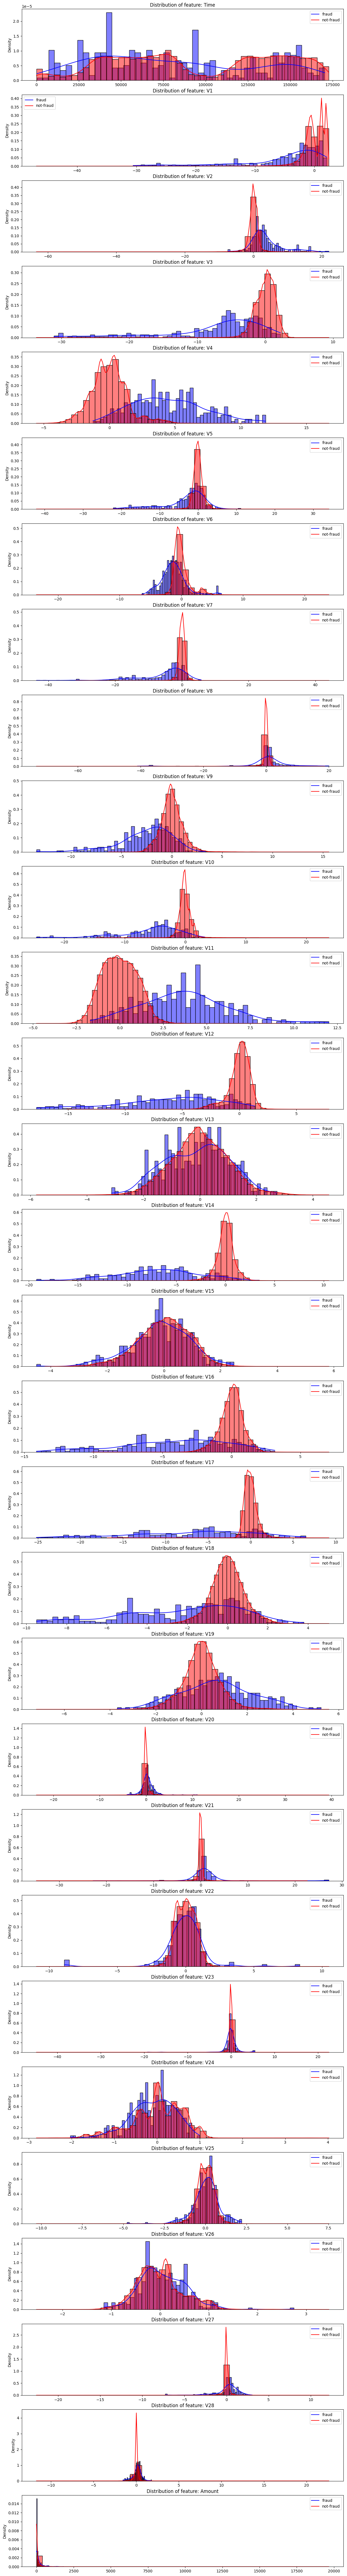

In [ ]:
# import matplotlib.gridspec as gridspec
# features=[f for f in df.columns if not 'Class' in f]
# nplots=np.size(features)
# plt.figure(figsize=(15,4*nplots))
# gs = gridspec.GridSpec(nplots,1)
# for i, feat in enumerate(features):
#     print(feat)
#     ax = plt.subplot(gs[i])
#     sns.histplot(X_train[np.where(y_train == 1), i], stat="density", kde=True, color="blue", bins=50)
#     sns.histplot(X_train[np.where(y_train == 0), i], stat="density", kde=True, color="red", bins=50)
#     ax.legend(['fraud', 'not-fraud'],loc='best')
#     ax.set_xlabel('')
#     ax.set_title('Distribution of feature: ' + feat)

features = [f for f in df.columns if not 'Class' in f]
X_train_df = pd.DataFrame(X_train, columns = features)
y_train_df = pd.DataFrame(y_train, columns = ['Class'])
nplots = np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train_df.loc[y_train == 1, feat], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train_df.loc[y_train == 0, feat], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraud', 'not-fraud'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)


Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model.

Anomaly detection is more effective when the anomaly exhibits a significantly different distribution compared to the normal data in the Gaussian model. In the above graphs, it's evident that features like V12 are more useful for anomaly detection since the distributions of the fraud and non-fraud events are significantly different. Features like V15 are not as useful because the distributions of the fraud and non-fraud events are almost identical **[0.5]**

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.


  see "the_table" below
  4. Find the best 3 features to distinguish fraud transactions from not-fraud transactions based on the AUC of the validation set.
  
  
  The best 3 features are V14, V10, and V4 **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`.
  

  The optimal threshold for feature V14, V10, and V4 are -19.4, -53.7, and -8.8 respectively. The function "search_optimal_threshold" performs threshold searching in two phases. Using the default parameters, in phase 1, 25 threshold points are tested in the range of 0 to -100. In phase 2, 50 threshold points are tested in the range of optimal threshold in phase 1 plus/minus 2.5. The phase 2 of the searching gives a more accurate solution. Alternatively, the function "optimal_threshold" can be used to perform searching only once to get the optimal threshold **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.
  

  The method "optimal_threshold" has a complexity of O(num_points), the method "search_optimal_threshold" has a complexity of O(num_points_phase_1 + num_points_phase_2) **[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-fraud transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table.


 see the "comparison table" **[0.8]**
 4. Are these results different or similar? Why?


 These results are very similar to each other because the number of non-fraud cases is significantly larger than that of fraud cases. The trained models in both cases (a and b) would bias toward the non-fraud case, resulting in getting super similar results from the two models **[0.5]**





In [ ]:
### YOUR CODE HERE ###
print('a. Fitting regardless of class:')
def fit_anyway(X_train,y_train,X_val,y_val):
  X_train = X_train.reshape(-1, 1)
  X_val = X_val.reshape(-1, 1)
  gm_sf = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm_sf.fit(X_train) # 1. Fit a single Gaussian distribution on a single feature
  p_tr = gm_sf.score_samples(X_train)
  p_vl = gm_sf.score_samples(X_val)
  auc_tr = roc_auc_score(y_train, -1 * p_tr) # 2. Compute AUC for training set
  auc_vl = roc_auc_score(y_val, -1 * p_vl) # and validation set
  return auc_tr,auc_vl

list_auc_tr = []
list_auc_vl = []
for i in range(28):
  auc_tr,auc_vl = fit_anyway(X_trainv[:,i],y_train,X_valv[:,i],y_val)
  list_auc_tr.append(auc_tr)
  list_auc_vl.append(auc_vl)
# print('AUC for training set:',list_auc_tr)
# print('AUC for validation set:',list_auc_vl)

the_table = pd.DataFrame() # 3. Repeat and present findings in a table
the_table['feature #'] = range(1,28+1,1)
the_table['AUC training'] = list_auc_tr
the_table['AUC validation'] = list_auc_vl
print('The table:')
print(the_table)

auc_avg = np.array(list_auc_vl) # 4. Find the best 3 features based on validation set
print('Feature number (V#) of the top three features:',np.argsort(auc_avg)[::-1][:3]+1) # V14, V10, V4
print('Validation AUC scores of the top three features:',auc_avg[np.argsort(auc_avg)[::-1][:3]])

a. Fitting regardless of class:
The table:
    feature #  AUC training  AUC validation
0           1      0.705102        0.694811
1           2      0.837499        0.837800
2           3      0.876537        0.838364
3           4      0.892103        0.888283
4           5      0.771825        0.786857
5           6      0.734380        0.673559
6           7      0.862967        0.867423
7           8      0.773238        0.774130
8           9      0.802874        0.776739
9          10      0.913600        0.905959
10         11      0.897175        0.882058
11         12      0.920180        0.837909
12         13      0.572152        0.561798
13         14      0.952459        0.938073
14         15      0.514764        0.509647
15         16      0.902137        0.882852
16         17      0.934852        0.881858
17         18      0.808030        0.785790
18         19      0.741874        0.770560
19         20      0.734692        0.686071
20         21      0.833521      

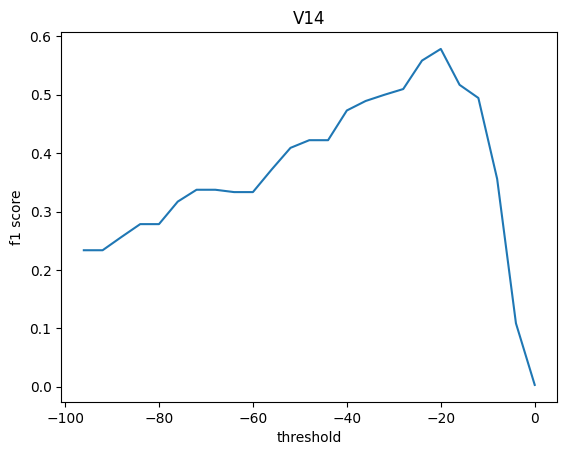

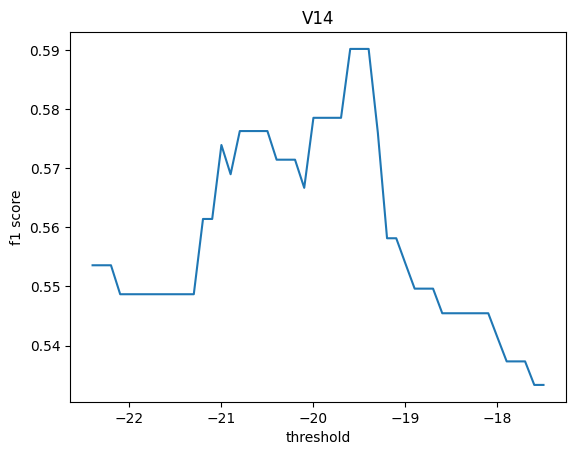

The optimal threshold for feature V14 is: -19.4


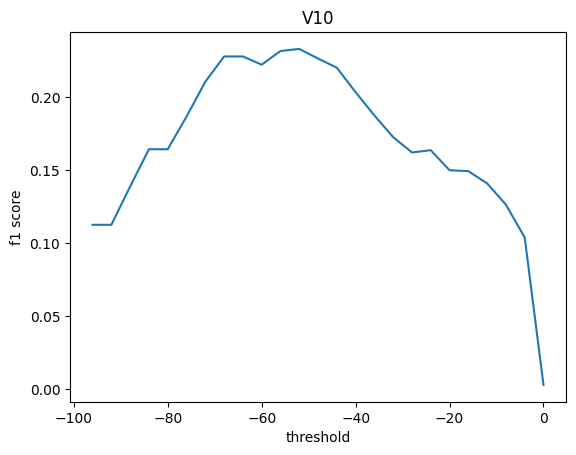

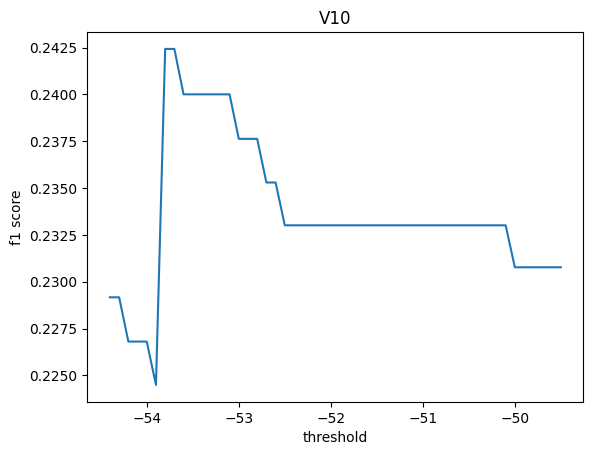

The optimal threshold for feature V10 is: -53.7


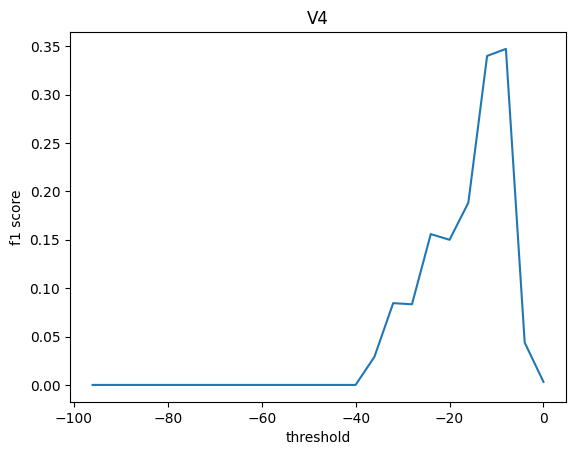

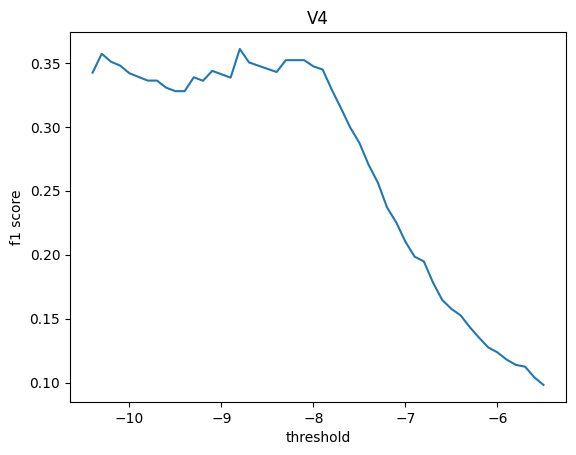

The optimal threshold for feature V4 is: -8.8


In [ ]:
def optimal_threshold(num_points,feature_num,ub,lb):
  num_points = num_points # number of threshold points to check
  feature_num = feature_num # the single feature number eg. 1 stands for feature V1

  single_feature = X_trainv[:,feature_num-1].reshape(-1, 1)
  target = X_valv[:,feature_num-1].reshape(-1, 1) # get scores on the validation set

  gm_2b = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm_2b.fit(single_feature) # fit to the training set
  p_2b = gm_2b.score_samples(target) # predict using the validation set

  ub = ub # the upper bound of the threshold to be checked
  lb = lb # the lower bound of the threshold to be checked

  steps = (ub - lb)/num_points # the increment

  list_hold = [] # store the threshold points checked
  list_f1 = [] # store the corresponding F1 score

  for i in range(num_points):
    y_pred = p_2b.copy() # initialize the y_pred array
    tr = ub-i*steps # the current threshold point
    list_hold.append(tr)
    y_pred[y_pred>=tr]=0 # 5. Make a prediction based on a model's scores
    y_pred[y_pred<tr]=1
    the_f1_score = f1_score(y_val,y_pred) # get the corresponding F1 score, check against the validation set
    list_f1.append(the_f1_score)

  plt.plot(list_hold,list_f1) # visualize threshold vs. F1 score
  plt.xlabel('threshold')
  plt.ylabel('f1 score')
  plt.title('V'+str(feature_num))
  plt.show()
  return np.array(list_hold),np.array(list_f1)

def search_optimal_threshold(feature_num,num_points_phase_1=25,ub_phase_1=0,lb_phase_1=-100,num_points_phase_2=50,range_phase_2=5): # a naive two phase search that doesn't check every possible threshold points with somewhat more accurate optimal threshold value
  list_hold,list_f1 = optimal_threshold(num_points=num_points_phase_1,feature_num=feature_num,ub=ub_phase_1,lb=lb_phase_1) # phase 1 search, refer to the above text box for details
  phase_1_optimal = list_hold[list_f1.argmax()]
  mid_point = list_hold[list_f1.argmax()]
  list_hold,list_f1 = optimal_threshold(num_points=num_points_phase_2,feature_num=feature_num,ub=mid_point+range_phase_2/2,lb=mid_point-range_phase_2/2) # phase 2 search, refer to the above text box for details
  phase_2_optimal = list_hold[list_f1.argmax()]
  phase_2_optimal_f1 = list_f1[list_f1.argmax()]
  return phase_1_optimal,phase_2_optimal,phase_2_optimal_f1

list_2a_tr = [] # store optimal threshold points from 2 a)
list_2a_f1 = [] # store corresponding F1 score from 2 a)
_,phase_2_optimal,phase_2_optimal_f1 = search_optimal_threshold(feature_num=14) # find optimal threshold for feature V14
list_2a_tr.append(phase_2_optimal)
list_2a_f1.append(phase_2_optimal_f1)
print('The optimal threshold for feature V14 is:',phase_2_optimal)
_,phase_2_optimal,phase_2_optimal_f1 = search_optimal_threshold(feature_num=10) # feature V10
list_2a_tr.append(phase_2_optimal)
list_2a_f1.append(phase_2_optimal_f1)
print('The optimal threshold for feature V10 is:',phase_2_optimal)
_,phase_2_optimal,phase_2_optimal_f1 = search_optimal_threshold(feature_num=4) # feature V4
list_2a_tr.append(phase_2_optimal)
list_2a_f1.append(phase_2_optimal_f1)
print('The optimal threshold for feature V4 is:',phase_2_optimal)

In [ ]:
print('b. Fitting based on class:')
X_trainv_nf = X_trainv[(y_train == 0).flatten()] # training set non-fraud
y_train_nf = y_train[y_train==0]
X_valv_nf = X_valv[(y_val == 0).flatten()] # validation set non-fraud
y_val_nf = y_val[y_val==0]
# # print(X_trainv_nf.shape)
# print(y_train_nf.shape)

def fit_anyway_one(X_train_one,X_train,y_train,X_val,y_val):
  X_train_one = X_train_one.reshape(-1, 1) # only non-fraud
  X_val = X_val.reshape(-1, 1)
  X_train = X_train.reshape(-1, 1)
  gm_sf = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm_sf.fit(X_train_one) # 1. Fit a single Gaussian distribution on a single feature
  p_tr = gm_sf.score_samples(X_train)
  p_vl = gm_sf.score_samples(X_val)

  auc_tr = roc_auc_score(y_train, -1 * p_tr) # 2. Compute AUC for training
  auc_vl = roc_auc_score(y_val, -1 * p_vl) # and validation set
  return auc_tr,auc_vl

list_auc_tr_nf = []
list_auc_vl_nf = []
for i in range(28):
  auc_tr,auc_vl = fit_anyway_one(X_trainv_nf[:,i],X_trainv[:,i],y_train,X_valv[:,i],y_val)
  list_auc_tr_nf.append(auc_tr)
  list_auc_vl_nf.append(auc_vl)

the_table_nf = pd.DataFrame()
the_table_nf['feature #'] = range(1,28+1,1)
the_table_nf['AUC training'] = list_auc_tr_nf
the_table_nf['AUC validation'] = list_auc_vl_nf
print('The table (non-fraud):')
print(the_table_nf)

print('Feature number (V#) of the top three features from 2a:',[14, 10, 4]) # V14, V10, V4
print('Validation AUC scores of the top three features from 2a:',[the_table_nf.iloc[13,2],the_table_nf.iloc[9,2],the_table_nf.iloc[3,2]])

b. Fitting based on class:
The table (non-fraud):
    feature #  AUC training  AUC validation
0           1      0.705350        0.694766
1           2      0.838015        0.837981
2           3      0.877392        0.839306
3           4      0.892612        0.888803
4           5      0.771881        0.786740
5           6      0.734514        0.673702
6           7      0.863167        0.867579
7           8      0.773353        0.774183
8           9      0.803263        0.777161
9          10      0.913558        0.905900
10         11      0.897612        0.882410
11         12      0.920788        0.839043
12         13      0.572142        0.561787
13         14      0.952599        0.938072
14         15      0.514781        0.509687
15         16      0.902069        0.882463
16         17      0.934440        0.880611
17         18      0.807980        0.785390
18         19      0.741989        0.770728
19         20      0.734835        0.686210
20         21      0.83387

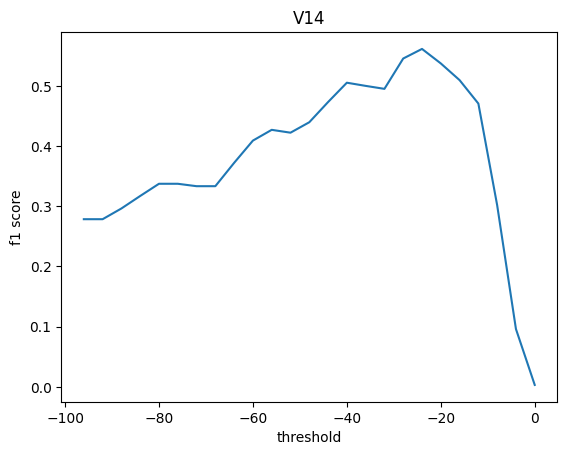

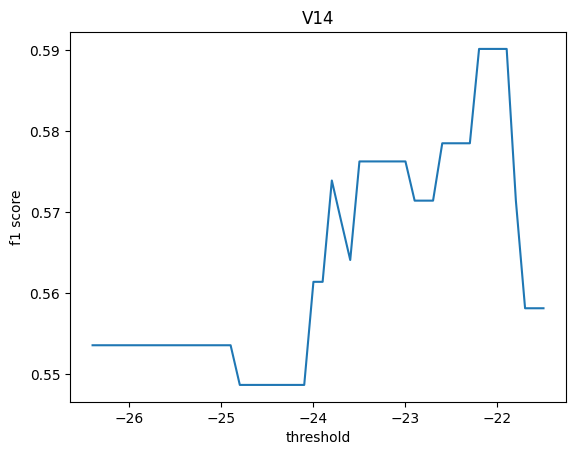

The optimal threshold for feature V14 is: -21.9


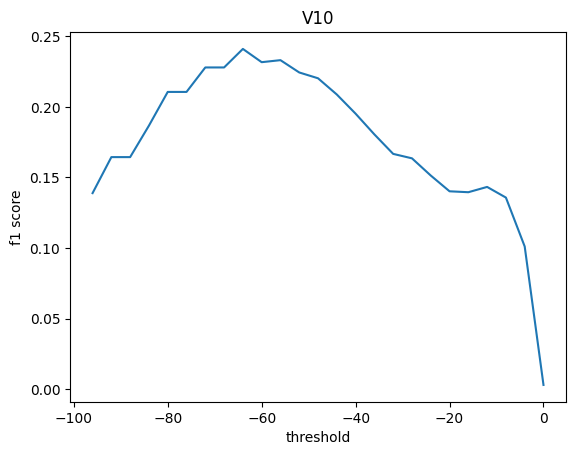

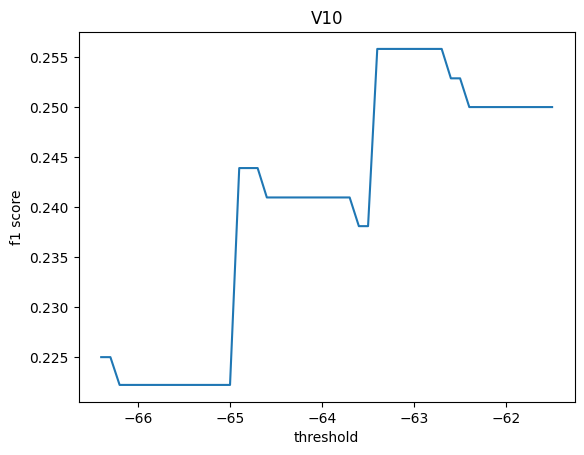

The optimal threshold for feature V10 is: -62.7


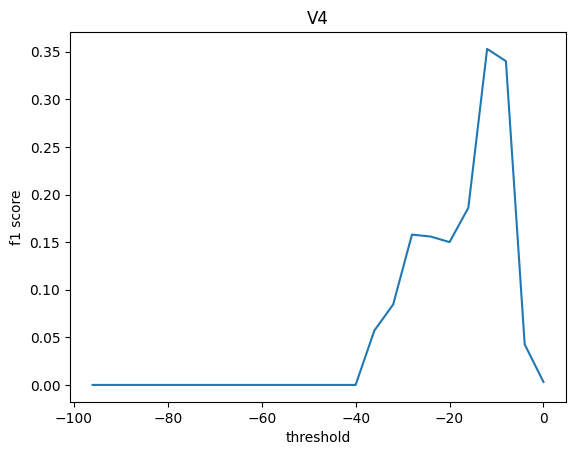

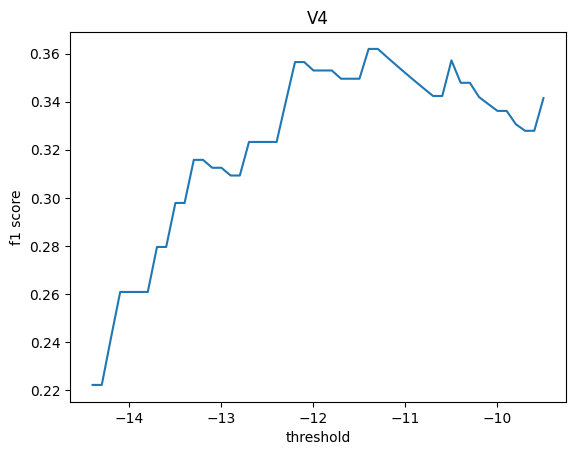

The optimal threshold for feature V4 is: -11.3


In [ ]:
def optimal_threshold(num_points,feature_num,ub,lb): # refer to the one in 2 a)
  num_points = num_points
  feature_num = feature_num

  single_feature = X_trainv_nf[:,feature_num-1].reshape(-1, 1) # use non-fraud data
  target = X_valv[:,feature_num-1].reshape(-1, 1)

  gm_2b = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm_2b.fit(single_feature) # fit to the training set
  p_2b = gm_2b.score_samples(target) # predict using the validation set

  ub = ub
  lb = lb

  steps = (ub - lb)/num_points

  list_hold = []
  list_f1 = []

  for i in range(num_points):
    y_pred = p_2b.copy()
    tr = ub-i*steps
    list_hold.append(tr)
    y_pred[y_pred>=tr]=0 # 5. Make a prediction based on a model's scores
    y_pred[y_pred<tr]=1
    the_f1_score = f1_score(y_val,y_pred) # get F1 score using the validation set
    list_f1.append(the_f1_score)

  plt.plot(list_hold,list_f1)
  plt.xlabel('threshold')
  plt.ylabel('f1 score')
  plt.title('V'+str(feature_num))
  plt.show()
  return np.array(list_hold),np.array(list_f1)

def search_optimal_threshold(feature_num,num_points_phase_1=25,ub_phase_1=0,lb_phase_1=-100,num_points_phase_2=50,range_phase_2=5): # refer to the one in 2 a)
  list_hold,list_f1 = optimal_threshold(num_points=num_points_phase_1,feature_num=feature_num,ub=ub_phase_1,lb=lb_phase_1) # phase 1 search
  phase_1_optimal = list_hold[list_f1.argmax()]
  mid_point = list_hold[list_f1.argmax()]
  list_hold,list_f1 = optimal_threshold(num_points=num_points_phase_2,feature_num=feature_num,ub=mid_point+range_phase_2/2,lb=mid_point-range_phase_2/2) # phase 2 search
  phase_2_optimal = list_hold[list_f1.argmax()]
  phase_2_optimal_f1 = list_f1[list_f1.argmax()]
  return phase_1_optimal,phase_2_optimal,phase_2_optimal_f1

list_2b_tr = [] # store optimal threshold points from 2 b)
list_2b_f1 = [] # store corresponding F1 score from 2 b)
_,phase_2_optimal,phase_2_optimal_f1 = search_optimal_threshold(feature_num=14) # find optimal threshold for feature V14
list_2b_tr.append(phase_2_optimal)
list_2b_f1.append(phase_2_optimal_f1)
print('The optimal threshold for feature V14 is:',phase_2_optimal)
_,phase_2_optimal,phase_2_optimal_f1 = search_optimal_threshold(feature_num=10) # feature V10
list_2b_tr.append(phase_2_optimal)
list_2b_f1.append(phase_2_optimal_f1)
print('The optimal threshold for feature V10 is:',phase_2_optimal)
_,phase_2_optimal,phase_2_optimal_f1 = search_optimal_threshold(feature_num=4) # feature V4
list_2b_tr.append(phase_2_optimal)
list_2b_f1.append(phase_2_optimal_f1)
print('The optimal threshold for feature V4 is:',phase_2_optimal)

In [ ]:
comparasion_table = pd.DataFrame()
comparasion_table['feature #'] = [14,10,4]
comparasion_table['AUC training (all classes)'] = [the_table.iloc[13,1],the_table.iloc[9,1],the_table.iloc[3,1]]
comparasion_table['AUC training (non-fraud)'] = [the_table_nf.iloc[13,1],the_table_nf.iloc[9,1],the_table_nf.iloc[3,1]]
comparasion_table['AUC validation (all classes)'] = [the_table.iloc[13,2],the_table.iloc[9,2],the_table.iloc[3,2]]
comparasion_table['AUC validation (non-fraud)'] = [the_table_nf.iloc[13,2],the_table_nf.iloc[9,2],the_table_nf.iloc[3,2]]
# comparasion_table['optimal threshold'] = list_2a_tr
# comparasion_table['optimal threshold (non-fraud)'] = list_2b_tr
comparasion_table['optimal F1 score (all classes)'] = list_2a_f1
comparasion_table['optimal F1 score (non-fraud)'] = list_2b_f1
print('The comparison table:')
print(comparasion_table)

The comparison table:
   feature #  AUC training (all classes)  AUC training (non-fraud)  \
0         14                    0.952459                  0.952599   
1         10                    0.913600                  0.913558   
2          4                    0.892103                  0.892612   

   AUC validation (all classes)  AUC validation (non-fraud)  \
0                      0.938073                    0.938072   
1                      0.905959                    0.905900   
2                      0.888283                    0.888803   

   optimal F1 score (all classes)  optimal F1 score (non-fraud)  
0                        0.590164                      0.590164  
1                        0.242424                      0.255814  
2                        0.360902                      0.361905  


## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis).
 3. Color the data points based on their class (not-fraud blue and fraud red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  


 In the explaination below, I look at the shape of the blue dots (valid transactions) in the training set.
 For the pair of feature V1 and V2, I fit 2 components as the plot shows a general "V" shape which can be treated as two clusters. For the pair of feature V14 and V12, I fit 3 components since the plot shows a shape of two "parallel lines" and a bulky body. For the pair of feature V17 and V16, I fit 2 components because the plot shows a shape of "hammer" which consists of mainly two parts. For the pair of feature V4 and V3, I fit 4 components as the plot shows a bulky body with three downward-pointing "spikes" **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6.


 The three new pairs are V14 paired with V12, V17 paired with V16, V4 paired with V3 **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.


 V14 paired with V12: -10.8

 V17 paired with V16: -9.9

 V4 paired with V3: -16.9
 **[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial)


 Similar to what's done in the tutorial, the training set and the validation set are both plotted for the demonstration purpose **[0.25]**





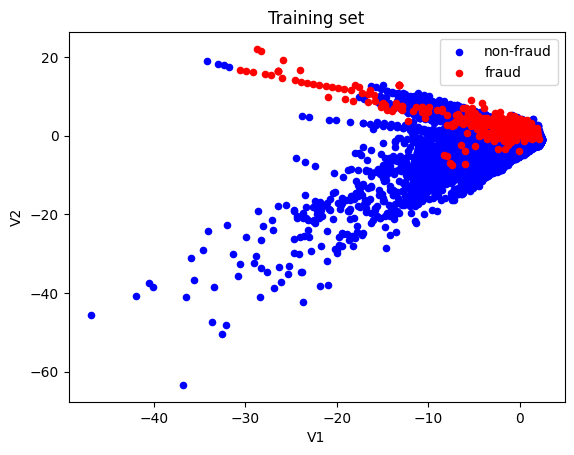

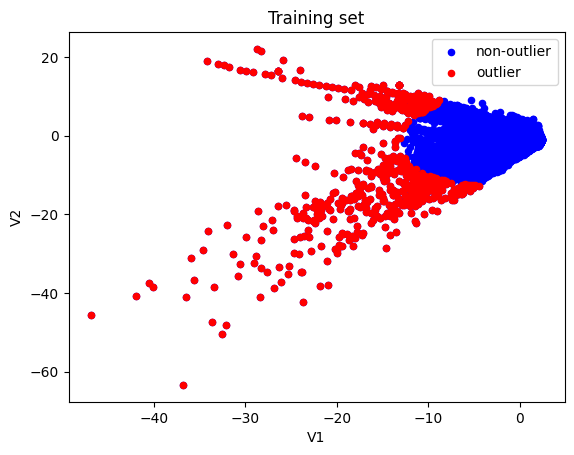

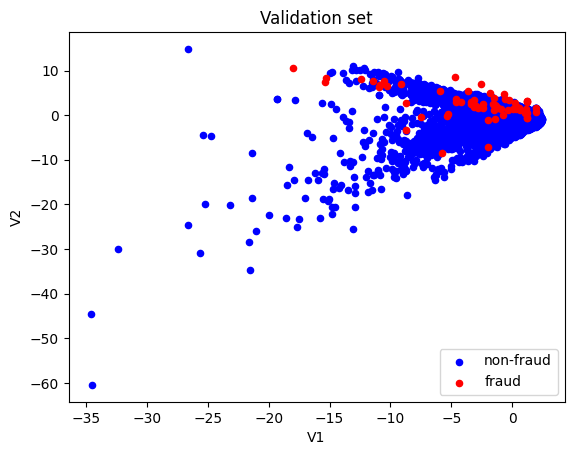

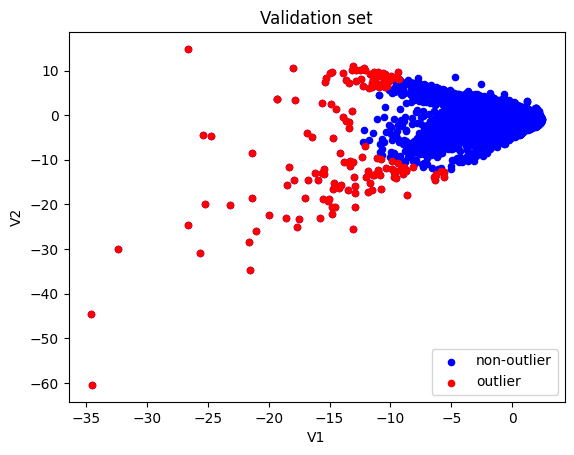

In this pair, V1 and V2, the AUC scores for the training and validation sets are 0.8805474329848777 and 0.861260934041286 respectively
The optimal F1 score is 0.08968609865470852
The optimal threshold is -23.6




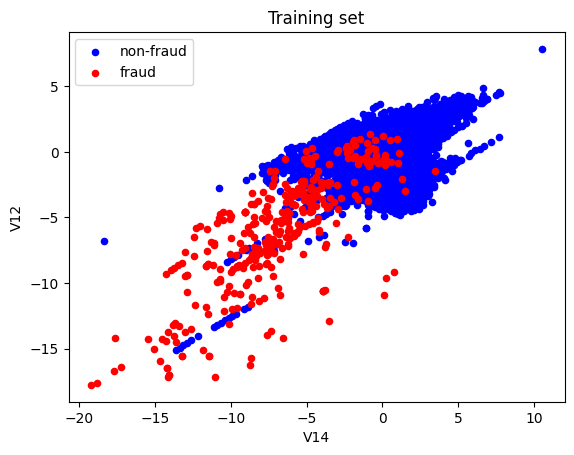

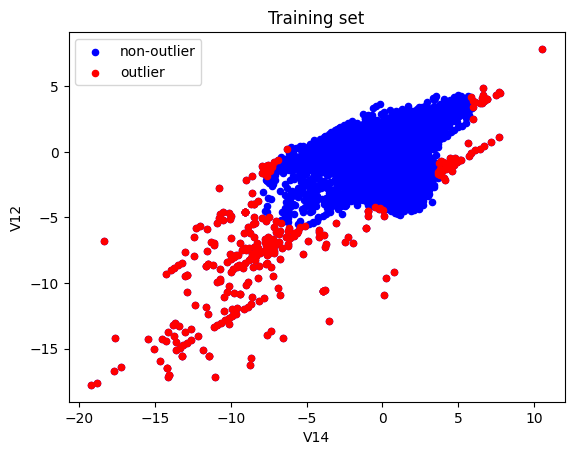

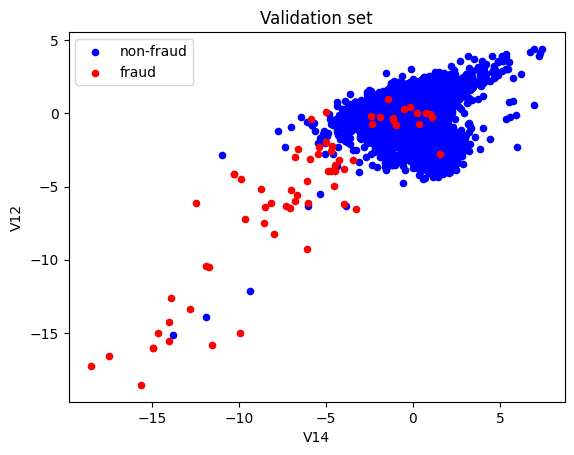

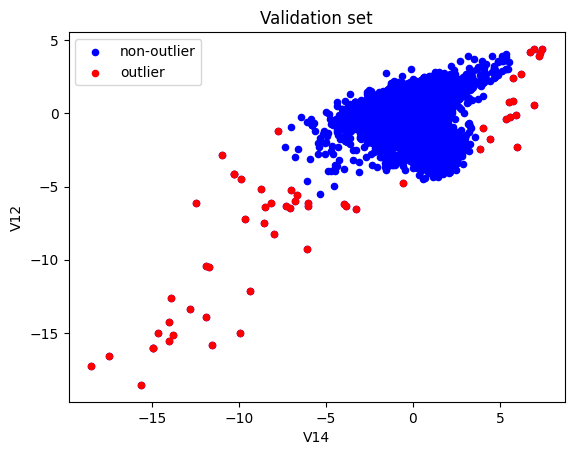

In this pair, V14 and V12, the AUC scores for the training and validation sets are 0.9657463772849304 and 0.9224775685505515 respectively
The optimal F1 score is 0.528
The optimal threshold is -10.8




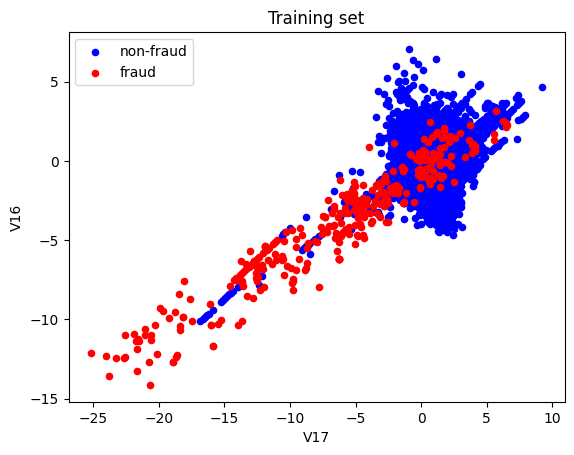

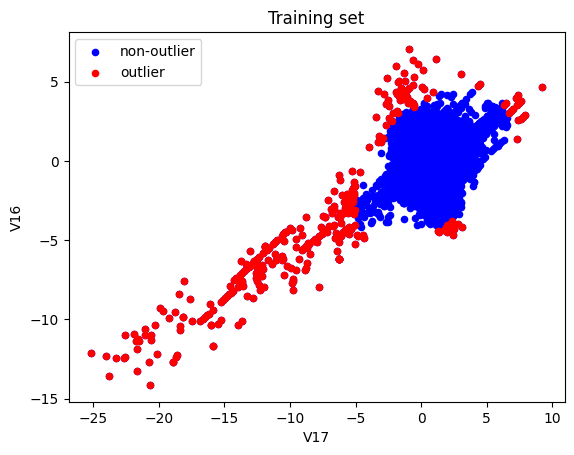

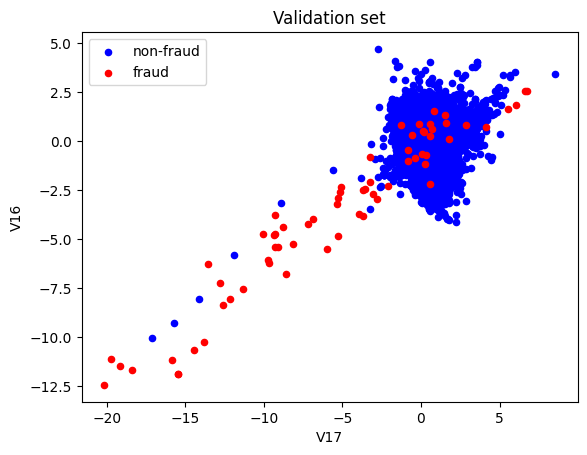

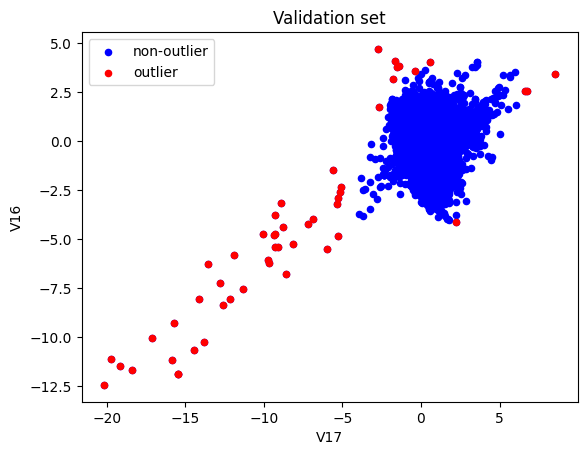

In this pair, V17 and V16, the AUC scores for the training and validation sets are 0.9449968472167576 and 0.9057021825742577 respectively
The optimal F1 score is 0.5932203389830508
The optimal threshold is -9.9




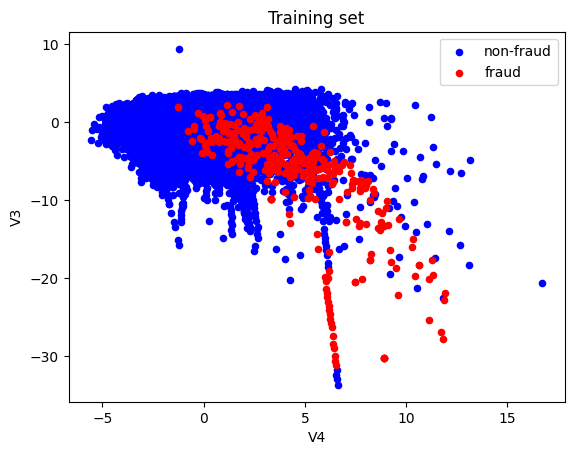

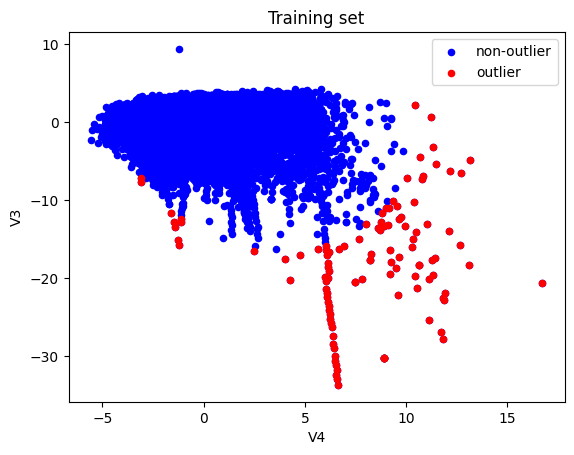

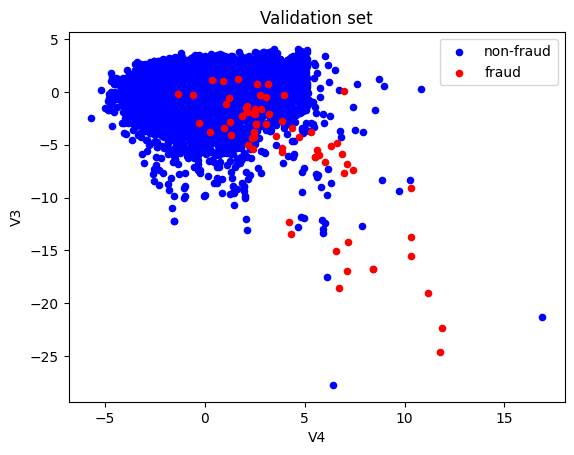

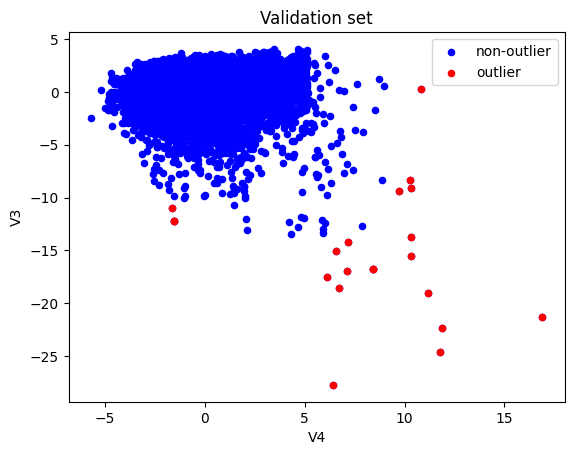

In this pair, V4 and V3, the AUC scores for the training and validation sets are 0.9299792729716069 and 0.918335247381044 respectively
The optimal F1 score is 0.2727272727272727
The optimal threshold is -16.9




In [ ]:
### YOUR CODE HERE ###
V_nf = X_trainv[(y_train == 0).flatten()] # V feature training set non-fraud
V_f = X_trainv[(y_train == 1).flatten()] # V feature training set fraud
# V_nf_tt = X_testv[(y_test == 0).flatten()] # V feature test set non-fraud
# V_f_tt = X_testv[(y_test == 1).flatten()] # V feature test set fraud
V_nf_vl = X_valv[(y_val == 0).flatten()] # V feature validation set non-fraud
V_f_vl = X_valv[(y_val == 1).flatten()] # V feature validation set fraud

def optimal_threshold_mfog(feature_x,feature_y,num_comp,num_points,ub,lb): # slightly modified but can refer to 2 a)
  num_points = num_points

  all_feature = X_trainv[:,[feature_x-1,feature_y-1]] # fit to both feature_x and feature_y
  target = X_valv[:,[feature_x-1,feature_y-1]] # use validation set

  gm_2b = GaussianMixture(n_components = num_comp, covariance_type = 'full', random_state=0)
  gm_2b.fit(all_feature) # fit to the training set
  p_2b = gm_2b.score_samples(target) # predict using the validation set

  ub = ub
  lb = lb

  steps = (ub - lb)/num_points

  list_hold = []
  list_f1 = []

  for i in range(num_points):
    y_pred = p_2b.copy()
    tr = ub-i*steps
    list_hold.append(tr)
    y_pred[y_pred>=tr]=0 # make a prediction based on a model's scores
    y_pred[y_pred<tr]=1
    the_f1_score = f1_score(y_val,y_pred) # get F1 score using validation set
    list_f1.append(the_f1_score)

  return np.array(list_hold),np.array(list_f1)

def search_optimal_threshold_mfog(feature_x,feature_y,num_comp,num_points_phase_1=25,ub_phase_1=0,lb_phase_1=-100,num_points_phase_2=50,range_phase_2=5): # refer to 2 a)
  list_hold,list_f1 = optimal_threshold_mfog(feature_x,feature_y,num_comp=num_comp,num_points=num_points_phase_1,ub=ub_phase_1,lb=lb_phase_1) # phase 1 search
  phase_1_optimal = list_hold[list_f1.argmax()]
  mid_point = list_hold[list_f1.argmax()]
  list_hold,list_f1 = optimal_threshold_mfog(feature_x,feature_y,num_comp=num_comp,num_points=num_points_phase_2,ub=mid_point+range_phase_2/2,lb=mid_point-range_phase_2/2) # phase 2 search
  phase_2_optimal = list_hold[list_f1.argmax()]
  phase_2_optimal_f1 = list_f1[list_f1.argmax()]
  return phase_1_optimal,phase_2_optimal,phase_2_optimal_f1

def plot_fx_fy(feature_x,feature_y): # plot two features
  plt.scatter(V_nf[:,feature_x-1],V_nf[:,feature_y-1],c='blue',label='non-fraud',s=20) # training set
  plt.scatter(V_f[:,feature_x-1],V_f[:,feature_y-1],c='red',label='fraud',s=20)
  plt.xlabel('V'+str(feature_x))
  plt.ylabel('V'+str(feature_y))
  plt.title('Training set')
  plt.legend()
  plt.show()

  plt.scatter(V_nf_vl[:,feature_x-1],V_nf_vl[:,feature_y-1],c='blue',label='non-fraud',s=20) # validation set
  plt.scatter(V_f_vl[:,feature_x-1],V_f_vl[:,feature_y-1],c='red',label='fraud',s=20)
  plt.xlabel('V'+str(feature_x))
  plt.ylabel('V'+str(feature_y))
  plt.title('Validation set')
  plt.legend()
  plt.show()

def part_3(feature_x,feature_y,num_comp):
  gm = GaussianMixture(n_components = num_comp, covariance_type = 'full', random_state=0)
  gm.fit(X_trainv[:,[feature_x-1,feature_y-1]])
  p_tr = gm.score_samples(X_trainv[:,[feature_x-1,feature_y-1]]) # get scores of training set
  p_vl = gm.score_samples(X_valv[:,[feature_x-1,feature_y-1]]) # get scores of validation set
  # p_tt = gm.score_samples(X_testv[:,[feature_x-1,feature_y-1]]) # get scores of test set
  auc_tr = roc_auc_score(y_train, -1 * p_tr) # compute AUC for training set
  auc_vl = roc_auc_score(y_val, -1 * p_vl) # and validation set
  _,threshold,f1_score = search_optimal_threshold_mfog(feature_x,feature_y,num_comp)

  plt.scatter(V_nf[:,feature_x-1],V_nf[:,feature_y-1],c='blue',label='non-fraud',s=20) # training set
  plt.scatter(V_f[:,feature_x-1],V_f[:,feature_y-1],c='red',label='fraud',s=20)
  plt.xlabel('V'+str(feature_x))
  plt.ylabel('V'+str(feature_y))
  plt.title('Training set')
  plt.legend()
  plt.show()

  plt.scatter(X_trainv[:,feature_x-1],X_trainv[:,feature_y-1],c='blue',label='non-outlier',s=20) # outlier visualization in training set c=gm.score_samples(X_trainv[:,[feature_x-1,feature_y-1]])
  outliers = np.nonzero(p_tr<threshold)[0]
  plt.scatter(X_trainv[outliers,feature_x-1],X_trainv[outliers,feature_y-1],c='red',label='outlier',s=20)
  plt.xlabel('V'+str(feature_x))
  plt.ylabel('V'+str(feature_y))
  plt.legend()
  plt.title('Training set')
  plt.show()

  plt.scatter(V_nf_vl[:,feature_x-1],V_nf_vl[:,feature_y-1],c='blue',label='non-fraud',s=20) # validation set
  plt.scatter(V_f_vl[:,feature_x-1],V_f_vl[:,feature_y-1],c='red',label='fraud',s=20)
  plt.xlabel('V'+str(feature_x))
  plt.ylabel('V'+str(feature_y))
  plt.title('Validation set')
  plt.legend()
  plt.show()

  plt.scatter(X_valv[:,feature_x-1],X_valv[:,feature_y-1],c='blue',label='non-outlier',s=20) # outlier visualization in validation set
  outliers = np.nonzero(p_vl<threshold)[0]
  plt.scatter(X_valv[outliers,feature_x-1],X_valv[outliers,feature_y-1],c='red',label='outlier',s=20)
  plt.xlabel('V'+str(feature_x))
  plt.ylabel('V'+str(feature_y))
  plt.legend()
  plt.title('Validation set')
  plt.show()
  print('In this pair, V'+str(feature_x)+' and V'+str(feature_y)+', the AUC scores for the training and validation sets are '+str(auc_tr)+' and '+str(auc_vl)+' respectively')
  print('The optimal F1 score is',f1_score)
  print('The optimal threshold is',threshold)
  print('\n')

#example pair: feature V1 and V2
part_3(1,2,2)

#pair 1: feature V14 and V12
part_3(14,12,3)

#pair 2: feature V17 and V16
part_3(17,16,2)

#pair 3: feature V4 and V3
part_3(4,3,4)

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraud and not-fraud transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as an anomaly. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is an anomaly (the transaction belongs to the $G_2$ distribution which represents fraud transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c?
  
  
  see the "result_table" **[1]**

In [ ]:
### YOUR CODE HERE ###
def search_c_sftg(single_feature_nf,single_feature_f,feature_num):
  single_feature_nf = single_feature_nf[:,feature_num-1].reshape(-1, 1) # single feature non-fraud
  single_feature_f = single_feature_f[:,feature_num-1].reshape(-1, 1) # single feature fraud
  target = X_valv[:,feature_num-1].reshape(-1, 1)
  target_tr = X_trainv[:,feature_num-1].reshape(-1, 1)

  gm_nf = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0) # 1. Fit a Gaussian distribution (𝐺1) on a feature of non-fraud transactions
  gm_nf.fit(single_feature_nf) # fit to the training set
  p_nf = gm_nf.score_samples(target) # get score S1 from validation set
  p_nf_tr = gm_nf.score_samples(target_tr) # get score S1 from training set

  gm_f = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0) # 2. Fit another Gaussian distribution (𝐺2) on the same feature but for fraud transactions
  gm_f.fit(single_feature_f)
  p_f = gm_f.score_samples(target) # get score S2 from validation set
  p_f_tr = gm_f.score_samples(target_tr) # get score S2 from training set

  list_f1 = []
  list_f1_tr = []
  c_list = np.arange(0, 51, 1).tolist()
  for c in c_list:
    y_pred = p_nf.copy()
    s1 = p_nf # 3. Compute the score samples (𝑆) for both 𝐺1 and 𝐺2 on the validation set to get 𝑆1 and 𝑆2, respectively
    s2 = p_f
    y_pred[s1<c*s2]=1
    y_pred[s1>=c*s2]=0
    list_f1.append(f1_score(y_val,y_pred))

  list_f1 = np.array(list_f1)
  best_f1 = list_f1[list_f1.argmax()]
  best_c = c_list[list_f1.argmax()] # 4. Find an optimal 𝑐

  y_pred_tr = p_nf_tr.copy()
  s1_tr = p_nf_tr
  s2_tr = p_f_tr
  c = best_c
  y_pred_tr[s1_tr<c*s2_tr]=1
  y_pred_tr[s1_tr>=c*s2_tr]=0
  list_f1_tr.append(f1_score(y_train,y_pred_tr))
  list_f1_tr = np.array(list_f1_tr)
  best_f1_tr = list_f1_tr[list_f1_tr.argmax()]

  return best_f1,best_c,best_f1_tr

best_c_list = []
best_f1_list = []
best_f1_list_tr = []
for i in range(1, 28 + 1): # 5. Repeat the steps above for all the features
  best_f1,best_c,best_f1_tr = search_c_sftg(V_nf,V_f,i)
  best_c_list.append(best_c)
  best_f1_list.append(best_f1)
  best_f1_list_tr.append(best_f1_tr)
  # print('For feature V'+str(i)+', the best F1 score and best c value is',best_f1,'and',best_c,'respectively')
result_table = pd.DataFrame()
result_table['feature#'] = np.arange(1, 29).tolist()
result_table['best c value (validation)'] = best_c_list
result_table['best F1 score (validation)'] = best_f1_list
result_table['best F1 score (training)'] = best_f1_list_tr
print(result_table)

    feature#  best c value (validation)  best F1 score (validation)  \
0          1                          5                    0.097087   
1          2                          3                    0.090909   
2          3                         13                    0.289157   
3          4                          5                    0.350877   
4          5                          5                    0.146067   
5          6                          2                    0.096070   
6          7                         19                    0.200000   
7          8                          4                    0.033520   
8          9                          3                    0.323810   
9         10                          8                    0.333333   
10        11                          4                    0.514286   
11        12                          5                    0.603774   
12        13                          1                    0.004734   
13    

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on not-fraud transactions or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots.

The model I designed has two-gaussian model with one component for the non-fraud gaussian model, takes in the user-specified features and user-specified number of components for the fraud gaussian model (as described in the hint below). See the "cases_table". "feature#" means the features get input in the model, "components (fraud)" is the n_components used for the fraud gaussian model. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraud ones! Why does it make sense to have multiple components for fraud transactions?

Refer to part 3.
Although non-fraud activities exhibits minor clusters, the non-frand cases usually gather closely together. And they are so close together that we can simply fit 1 components. But fraud activities tend to spread more widely than the non-fraud cases. So, we need multiple components to capture as many fraud activities as possible

In [ ]:
### YOUR CODE HERE ###
def twoG_mulitiF_singleC(feature_num,num_comp): # this two-gaussian model with one component for the non-fraud gaussian model, takes in the user-specified features and user-specified number of components for the fraud gaussian model
  feature_num = feature_num
  feature_num = np.array(feature_num)
  single_feature_nf = V_nf[:,(feature_num-1).tolist()]# multi feature non-fraud
  single_feature_f = V_f[:,(feature_num-1).tolist()] # multi feature fraud
  target = X_valv[:,(feature_num-1).tolist()]
  target_tr = X_trainv[:,(feature_num-1).tolist()]

  gm_nf = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0) # single component for non-fraud
  gm_nf.fit(single_feature_nf) # fit to the training set
  p_nf = gm_nf.score_samples(target) # get score S1 from validation set
  p_nf_tr = gm_nf.score_samples(target_tr) # get score S1 from training set

  gm_f = GaussianMixture(n_components = num_comp, covariance_type = 'full', random_state=0) # multi component for fraud
  gm_f.fit(single_feature_f) # fit to the training set
  p_f = gm_f.score_samples(target) # get score S2 from validation set
  p_f_tr = gm_f.score_samples(target_tr) # get score S2 from training set

  list_f1 = []
  list_auc = []

  c_list = np.arange(0, 51, 1).tolist()
  for c in c_list:
    y_pred = p_nf.copy()
    s1 = p_nf
    s2 = p_f
    y_pred = np.where(s1<c*s2, 1, 0) # for a given row, if all columns in s1 is less than c times all the columns in s2, then it's fraud
    list_f1.append(f1_score(y_val,y_pred))
    list_auc.append(roc_auc_score(y_val, y_pred))

  list_f1 = np.array(list_f1)
  best_f1 = list_f1[list_f1.argmax()]
  best_c = c_list[list_f1.argmax()]
  best_auc = list_auc[list_f1.argmax()]

  y_pred_tr = p_nf_tr.copy()
  s1_tr = p_nf_tr
  s2_tr = p_f_tr
  c = best_c
  y_pred_tr = np.where(s1_tr<c*s2_tr, 1, 0)
  best_f1_tr = f1_score(y_train,y_pred_tr)
  best_auc_tr = roc_auc_score(y_train, y_pred_tr)
  return best_f1,best_c,best_auc,best_f1_tr,best_auc_tr

#feature candidate: V 17,14,12,16,11,18,4,10,9,3,7,5
testing_cases = [[[17,14,12,16,11,18,4,10,9,3,7,5],1],
                 [[17,14,12,16,11,18,4,10,9,3,7,5],2],
                 [[17,14,12,16,11,18,4,10,9,3,7,5],3],
                 [[17,14,12,16,11,18,4,10,9,3,7,5],4],
                 [[17,14,12,16,11,18,4],1],
                 [[17,14,12,16,11,18,4],3],
                 [[17,14,12],1],
                 [[17,14,12],3],
                 [[17,14],2],
                 [[17,14],3]]
cases_auc_tr = []
cases_auc_vl = []
cases_f1_tr = []
cases_f1_vl = []
cases_best_c = []
for i in range(10):
  best_f1,best_c,best_auc,best_f1_tr,best_auc_tr = twoG_mulitiF_singleC(testing_cases[i][0],testing_cases[i][1])
  cases_auc_tr.append(best_auc_tr)
  cases_auc_vl.append(best_auc)
  cases_f1_tr.append(best_auc_tr)
  cases_f1_vl.append(best_auc)
  cases_best_c.append(best_c)

cases_table = pd.DataFrame()
cases_table['feature#'] = [sublist[0] for sublist in testing_cases]
cases_table['components (fraud)'] = [sublist[1] for sublist in testing_cases]
cases_table['AUC (validation)'] = cases_auc_vl
cases_table['AUC (training)'] = cases_auc_tr
cases_table['F1 score (validation)'] = cases_f1_vl
cases_table['F1 score (training)'] = cases_f1_tr
cases_table['best c value (validation)'] = cases_best_c
print(cases_table)

                                      feature#  components (fraud)  \
0  [17, 14, 12, 16, 11, 18, 4, 10, 9, 3, 7, 5]                   1   
1  [17, 14, 12, 16, 11, 18, 4, 10, 9, 3, 7, 5]                   2   
2  [17, 14, 12, 16, 11, 18, 4, 10, 9, 3, 7, 5]                   3   
3  [17, 14, 12, 16, 11, 18, 4, 10, 9, 3, 7, 5]                   4   
4                  [17, 14, 12, 16, 11, 18, 4]                   1   
5                  [17, 14, 12, 16, 11, 18, 4]                   3   
6                                 [17, 14, 12]                   1   
7                                 [17, 14, 12]                   3   
8                                     [17, 14]                   2   
9                                     [17, 14]                   3   

   AUC (validation)  AUC (training)  F1 score (validation)  \
0          0.850652        0.898408               0.850652   
1          0.880468        0.911351               0.880468   
2          0.880445        0.912765        

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set.

The best model is one I designed in part 5, which has two gaussian models, one component for the non-fraud one, multiple components for the fraud one, and takes multiple features. The selected specification for this model include features [V17,V14,V12,V16,V11,V18,V4,V10,V9,V3,V7,V5], parameter c set to 3, and 4 components for the fraud gaussian model. The model is tested on the test set, and its F1 score, precision score, and recall score are 0.824, 0.778, 0.875 respectively
 **[1]**


In [ ]:
### YOUR CODE HERE ###
def twoG_mulitiF_singleC_picked(): # this two-gaussian model with one component for the non-fraud gaussian model and 4 components for the fraud gaussian model
  feature_num = [17,14,12,16,11,18,4,10,9,3,7,5] # this is the best according to cases_table
  num_comp = 4 # this is the best according to cases_table
  feature_num = np.array(feature_num)
  single_feature_nf = V_nf[:,(feature_num-1).tolist()]# multi feature non-fraud
  single_feature_f = V_f[:,(feature_num-1).tolist()] # multi feature fraud
  target = X_testv[:,(feature_num-1).tolist()] # use the test set

  gm_nf = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0) # single component for non-fraud
  gm_nf.fit(single_feature_nf) # fit to the training set
  p_nf = gm_nf.score_samples(target) # get score S1 from test set

  gm_f = GaussianMixture(n_components = num_comp, covariance_type = 'full', random_state=0) # multi component for fraud
  gm_f.fit(single_feature_f)
  p_f = gm_f.score_samples(target) # get score S2 from test set

  list_f1 = []
  list_auc = []
  list_pre = []
  list_rec = []
  c = 3 # this is the best according to cases_table
  y_pred = p_nf.copy()
  s1 = p_nf
  s2 = p_f
  y_pred = np.where(s1<c*s2, 1, 0) # for a given row, if all columns in s1 is less than c times all the columns in s2, then it's fraud
  list_f1.append(f1_score(y_test,y_pred)) # get required values (F1, presicion, recall) using the test set
  list_auc.append(roc_auc_score(y_test, y_pred))
  list_pre.append(precision_score(y_test, y_pred))
  list_rec.append(recall_score(y_test, y_pred))

  list_f1 = np.array(list_f1)
  best_f1 = list_f1[list_f1.argmax()]
  best_c = c
  best_auc = list_auc[list_f1.argmax()]
  best_rec = list_rec[list_f1.argmax()]
  best_pre = list_pre[list_f1.argmax()]
  return best_f1,best_c,best_auc,best_pre,best_rec
best_f1,_,_,best_pre,best_rec = twoG_mulitiF_singleC_picked()
print('For the best model, the F1 score, the precision score, and the recall score are '+str(best_f1)+', '+str(best_pre)+', '+str(best_rec)+' respectively')

For the best model, the F1 score, the precision score, and the recall score are 0.823529411764706, 0.7777777777777778, 0.875 respectively


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.




*  What are other distributions that could be used for modeling the data? How popular are they? Is there a specific situation where a distribution works better?

The first example is the binomial distribution. Unlike the continuous distributions such as the normal distribution, binomial distribution is one of the discrete distributions, which is used to find the probability for x successes in n trials, given a success probability p for each trial, under some assumptions. Binomial distribution is mostly used for models dichotomous outcome variables, including the election results [1].

The second example is the log-normal distribution. Log-normal distribution can be transformed from a normal distribution via logarithmic calculations. Log-normal distibution is commonly used in the finance domain such as stock pricing [2]. Log-normal distribution is typically preferred over the normal distribution due to its advantages, including the restriction to positive values and the flexibility of adjusting the skewness of the distribution by choosing different bases.

The third example is the weibull distribution. Weibull distribution is a very versatile distribution that can handle unimodel continuous data. It's usually used to model skewed data. It has a wide range of applications, particularly in the failure analysis [3].
*  How can we find a suitable distribution to model our data?

We can do it via visualization. We can create histogram plots, the probability distribution function plots (PDF/CDF), and the quantile-quantile (Q-Q) plots [4]. These plots can effectively visualize the descriptive statistics such as the standard deviation and mean of the distribution.


[1] A. Barone, “Binomial distribution: Definition, formula, analysis, and example,” Investopedia, https://www.investopedia.com/terms/b/binomialdistribution.asp.

[2] W. Kenton, “Log-normal distribution: Definition, uses, and how to calculate,” Investopedia, https://www.investopedia.com/terms/l/log-normal-distribution.asp.

[3] J. Frost, “Weibull distribution: Uses, parameters &amp; examples,” Statistics By Jim, https://statisticsbyjim.com/probability/weibull-distribution/.

[4] E. Taskesen, “How to find the best theoretical distribution for your data,” Medium, https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd.